# **Homework 2**

**Problem 1**

1. Point estimate of Beta0 = -31.8043

   Point estimate of Beta1 = 16.2056

2. The standard error for beta_0 is: 5.7635

   The standard error for beta_1 is: 0.5484

3. According to the OLS Regression results, the 95% confidence interval for Beta0 = [-43.170,-20.438] and the CI for Beta1 = [15.119,17.292]. Also, the P-value for both is close to zero and the null hypothesis can be rejected. Since both the CI's don't contain zero there exists no correlation. Therefore, the slope Beta1 is significantly different from zero


4. R-square = 0.8137

5. Predicted y-value for x=10 : 130.2520

**Problem 2**

1. Point estimate of Beta0 = -18.0505

   Point estimate of Beta1 = 16.9156

   Point estimate of Beta2 = -0.1420

2. The standard error for beta_0 is: 8.138

   The standard error for beta_1 is: 0.622

   The standard error for beta_1 is: 0.060

3. According to the OLS Regression results, the 95% confidence interval for Beta0 = [-34.100,-2.001] and the CI for Beta1 = [15.689,18.142], CI for Beta2 = [-0.260, -0.024]. Also, the P-value for Beta0, Beta1 and Beta2 are 0.028, 0.000, 0.019 respectively. Since all the p-values < 0.05, the null hypothesis can be rejected. Since none of the CI's contain zero there exists no correlation among them. Therefore, the slopes Beta1 and Beta2 are significantly different from zero   

4. R-square = 0.819

In [1]:
%matplotlib notebook
from typing import List
from typing import Tuple
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

from tqdm import tqdm
from numpy import loadtxt

sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading data

In [2]:
data = pd.read_csv("data.dat")
data.head()
print(data.shape)

(200, 2)


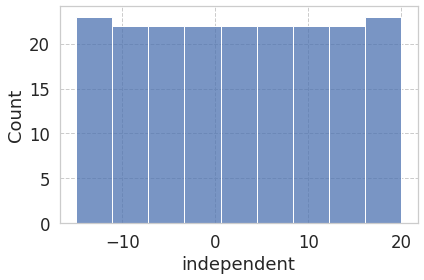

In [3]:
# distribution of the dependent variable
sns.histplot(x="independent", data=data)
plt.tight_layout()

## Simple linear regression (Question 1)

beta_0 is: -31.8043
beta_1 is: 16.2056
R-square is: 0.8137
Predicted value for x=10 is: 130.2520


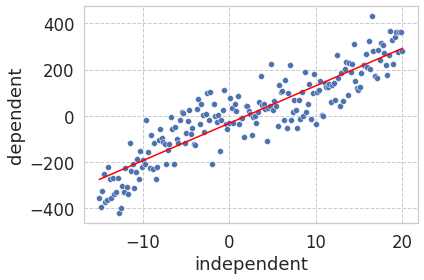

In [4]:
x = data["independent"]
y = data["dependent"]

def simple_linear_regression(
    x: Union[List, np.ndarray, pd.Series], 
    y: Union[List, np.ndarray, pd.Series]) -> Tuple[float, float]:
    """Return the intercept and slope of a simple linear regression."""
    beta_1 = np.cov(x, y)[0][1] / np.cov(x, x)[0][1]
    beta_0 = np.mean(y) - beta_1 * np.mean(x)
    
    return beta_0, beta_1

beta_0, beta_1 = simple_linear_regression(x=x, y=y)

# calculate R^2
y_pred = beta_0 + beta_1 * x
SST = np.sum(np.square(y - np.mean(y)))
residual = y - y_pred
SSE = np.sum(np.square(residual))
r2 = 1 - SSE / SST

y_pred2 = beta_0 + beta_1 * 10


print(f"beta_0 is: {beta_0:5.4f}")
print(f"beta_1 is: {beta_1:5.4f}")
print(f"R-square is: {r2:5.4f}")
print(f"Predicted value for x=10 is: {y_pred2:5.4f}")

plt.figure()
x_range = np.linspace(start=np.min(x), stop=np.max(x), num=100)
sns.scatterplot(x="independent", y="dependent", data=data)
sns.lineplot(x=x_range, y=(beta_0 + beta_1 * x_range), color="red")
plt.tight_layout()

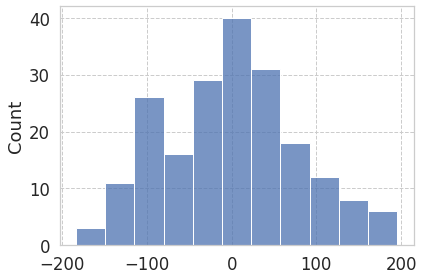

In [5]:
# residual analysis
plt.figure()
sns.histplot(residual)
plt.tight_layout()
plt.show()

100%|██████████| 100/100 [00:02<00:00, 36.80it/s]


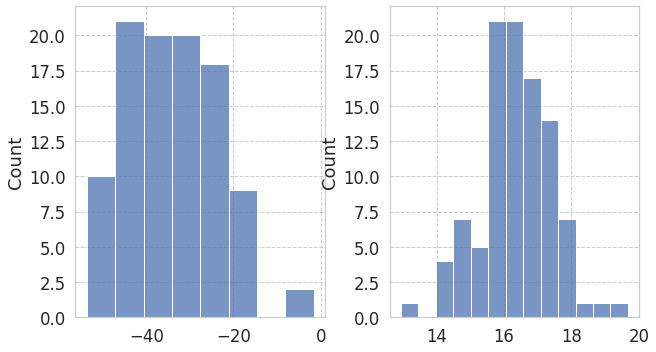

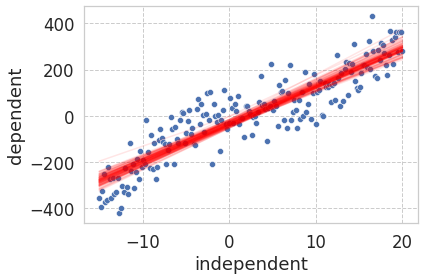

In [6]:
# accuracy of the coefficients
np.random.seed(42)
n_trials = 100

beta_0s, beta_1s = [], []
for _ in tqdm(range(n_trials)):
    sampling_proba = 0.2
    mask = np.random.choice([True, False], size=len(x), p=[sampling_proba, 1 - sampling_proba])
    x_sampled, y_sampled = x[mask], y[mask]
    beta_0, beta_1 = simple_linear_regression(x=x_sampled, y=y_sampled)
    beta_0s.append(beta_0)
    beta_1s.append(beta_1)

# plot the histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))
sns.histplot(beta_0s, ax=axes[0])
sns.histplot(beta_1s, ax=axes[1])
plt.tight_layout()

# plot the fited lines
plt.figure()
x_range = np.linspace(start=np.min(x), stop=np.max(x), num=100)
for i in tqdm(range(len(beta_0s))):
    sns.lineplot(x=x_range, y=(beta_0s[i] + beta_1s[i] * x_range), color="red", alpha=0.1)
sns.scatterplot(x="independent", y="dependent", data=data)
plt.tight_layout()

In [7]:
# confidence intervals
SE_beta_0 = (np.var(residual, ddof=2) * (1. / len(x) + (np.mean(x))**2 / np.sum((x - np.mean(x))**2)))**0.5
SE_beta_1 = (np.var(residual) / np.sum((x - np.mean(x))**2))**0.5 

print(f"The standard error for beta_0 is: {SE_beta_0:5.4f}")
print(f"The standard error for beta_1 is: {SE_beta_1:5.4f}")

The standard error for beta_0 is: 5.7635
The standard error for beta_1 is: 0.5484


In [8]:
# simple linear regression with the `statsmodels` library
model_1 = smf.ols(formula='dependent~independent', data=data)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:              dependent   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     864.6
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           3.61e-74
Time:                        18:11:12   Log-Likelihood:                -1157.0
No. Observations:                 200   AIC:                             2318.
Df Residuals:                     198   BIC:                             2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -31.8043      5.764     -5.518      

## Multi-variant linear regression (Question 2)

In [12]:
data['independent2'] = data.independent ** 2
model_2 = smf.ols(formula='dependent ~ independent + independent2', data=data)
# model_2 = smf.ols(formula='dependent ~ independent + np.power(independent,2)', data=data)
result_2 = model_2.fit()
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:              dependent   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     445.1
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           8.42e-74
Time:                        18:30:56   Log-Likelihood:                -1154.2
No. Observations:                 200   AIC:                             2314.
Df Residuals:                     197   BIC:                             2324.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -18.0505      8.138     -2.218   